# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Overview Of Data

In [2]:
df=pd.read_csv(r"C:\Users\NOUR SOFT\Desktop\New folder\framingham_heart_study.csv")


In [414]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [415]:
df.duplicated().sum()

0

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [417]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Decoding And Show unique value in each column 

In [419]:
df["male"].unique()

array([1, 0], dtype=int64)

In [420]:
def male(x):
    if x ==0 :
        return "female"
    else:
        return "male"
    

In [421]:
df["gender"]=df["male"].apply( male)

In [422]:
df=df.drop(["male"],axis=1)

In [423]:
df["education"].unique()

array([ 4.,  2.,  1.,  3., nan])

In [424]:
df["currentSmoker"].unique()

array([0, 1], dtype=int64)

In [425]:
def n(x):
    if x ==1 :
        return "yes"
    else:
        return "no"


df["currentSmoker"]=df["currentSmoker"].apply(n)    

In [426]:
df["currentSmoker"].unique()

array(['no', 'yes'], dtype=object)

In [427]:
df["cigsPerDay"].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [428]:
df["BPMeds"].unique()

array([ 0.,  1., nan])

In [429]:
def n(x):
    if x ==1 :
        return "yes"
    elif x==0:
        return "no"
    else:
        return np.nan


df["BPMeds"]=df["BPMeds"].apply(n)    

In [430]:
df["BPMeds"].unique()

array(['no', 'yes', nan], dtype=object)

In [431]:
df["prevalentStroke"].unique()

array([0, 1], dtype=int64)

In [432]:
def n(x):
    if x ==1 :
        return "yes"
    else:
        return "no"


df["prevalentStroke"]=df["prevalentStroke"].apply(n)    
    

In [433]:
df["diabetes"].unique()

array([0, 1], dtype=int64)

In [434]:
def n(x):
    if x ==1 :
        return "yes"
    else:
        return "no"


df["diabetes"]=df["diabetes"].apply(n)   

In [435]:
df["prevalentHyp"].unique()

array([0, 1], dtype=int64)

In [436]:
def n(x):
    if x ==1 :
        return "yes"
    else:
        return "no"


df["prevalentHyp"]=df["prevalentHyp"].apply(n)   

In [437]:
def n(x):
    if x ==1 :
        return "yes"
    else:
        return "no"


df["TenYearCHD"]=df["TenYearCHD"].apply(n)   

# Solve the missing values 

In [439]:
df

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
0,39,4.0,no,0.0,no,no,no,no,195.0,106.0,70.0,26.97,80.0,77.0,no,male
1,46,2.0,no,0.0,no,no,no,no,250.0,121.0,81.0,28.73,95.0,76.0,no,female
2,48,1.0,yes,20.0,no,no,no,no,245.0,127.5,80.0,25.34,75.0,70.0,no,male
3,61,3.0,yes,30.0,no,no,yes,no,225.0,150.0,95.0,28.58,65.0,103.0,yes,female
4,46,3.0,yes,23.0,no,no,no,no,285.0,130.0,84.0,23.10,85.0,85.0,no,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48,2.0,yes,20.0,NaN,no,no,no,248.0,131.0,72.0,22.00,84.0,86.0,no,female
4236,44,1.0,yes,15.0,no,no,no,no,210.0,126.5,87.0,19.16,86.0,NaN,no,female
4237,52,2.0,no,0.0,no,no,no,no,269.0,133.5,83.0,21.47,80.0,107.0,no,female
4238,40,3.0,no,0.0,no,no,yes,no,185.0,141.0,98.0,25.60,67.0,72.0,no,male


In [440]:
df.describe(include="O")

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,gender
count,4240,4187,4240,4240,4240,4240,4240
unique,2,2,2,2,2,2,2
top,no,no,no,no,no,no,female
freq,2145,4063,4215,2923,4131,3596,2420


In [441]:
df.isna().mean()*100 #All columns have a small percentage loss in values.

age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
gender             0.000000
dtype: float64

In [442]:
df[["age","education"]]

,age,education
0,39,4.0
1,46,2.0
2,48,1.0
3,61,3.0
4,46,3.0
...,...,...
4235,48,2.0
4236,44,1.0
4237,52,2.0
4238,40,3.0


In [443]:
df[df["age"]==48][["age","education"]] # no relation with age and education 

,age,education
2,48,1.0
16,48,3.0
103,48,1.0
112,48,4.0
145,48,4.0
...,...,...
4147,48,1.0
4212,48,2.0
4213,48,2.0
4219,48,1.0


In [444]:
df[df["education"].isna()][["age","education"]]	

,age,education
33,61,NaN
36,56,NaN
72,37,NaN
184,67,NaN
213,34,NaN
...,...,...
4082,47,NaN
4098,37,NaN
4121,55,NaN
4122,69,NaN


In [445]:
df[df["age"]==61]#random 

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
3,61,3.0,yes,30.0,no,no,yes,no,225.0,150.0,95.0,28.58,65.0,103.0,yes,female
28,61,3.0,no,0.0,no,no,yes,no,272.0,182.0,121.0,32.80,85.0,65.0,yes,female
33,61,NaN,yes,5.0,no,no,no,no,175.0,134.0,82.5,18.59,72.0,75.0,yes,male
84,61,1.0,no,0.0,no,no,yes,no,210.0,182.0,101.0,29.35,70.0,83.0,no,female
87,61,2.0,yes,1.0,no,no,yes,no,326.0,200.0,104.0,38.46,57.0,78.0,no,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,61,2.0,no,0.0,no,no,no,no,271.0,122.0,67.5,22.02,73.0,73.0,no,female
4111,61,3.0,no,0.0,no,no,no,no,257.0,141.0,80.0,33.90,85.0,60.0,yes,female
4157,61,4.0,no,0.0,no,no,no,no,325.0,125.5,85.5,24.40,68.0,70.0,no,female
4199,61,1.0,no,0.0,no,no,no,no,271.0,133.0,83.0,25.31,90.0,60.0,yes,female


In [446]:
df[df["age"]==56]#random 

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
36,56,NaN,no,0.0,no,no,no,no,257.0,153.5,102.0,28.09,72.0,75.0,no,male
60,56,4.0,yes,20.0,no,no,no,no,270.0,121.0,79.0,23.58,95.0,93.0,no,male
98,56,1.0,no,0.0,no,no,yes,no,296.0,180.0,90.0,23.72,75.0,120.0,no,female
99,56,1.0,yes,15.0,no,no,no,no,269.0,121.0,75.0,22.36,50.0,66.0,no,female
133,56,2.0,yes,20.0,no,no,no,no,246.0,128.0,64.0,25.54,92.0,92.0,no,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,56,2.0,no,0.0,yes,no,yes,no,260.0,158.0,102.5,26.89,90.0,88.0,no,female
4160,56,3.0,yes,20.0,no,no,no,no,240.0,112.5,71.5,24.99,72.0,NaN,no,female
4214,56,3.0,yes,5.0,no,no,no,no,230.0,123.0,78.5,24.71,76.0,87.0,yes,female
4223,56,4.0,no,0.0,yes,no,yes,no,287.0,149.0,98.0,21.68,90.0,75.0,yes,male


In [447]:
educations=df["education"].value_counts(normalize=True).index
probablities=df["education"].value_counts(normalize=True).values
df["education"]=df["education"].fillna(np.random.choice(educations,p=probablities))

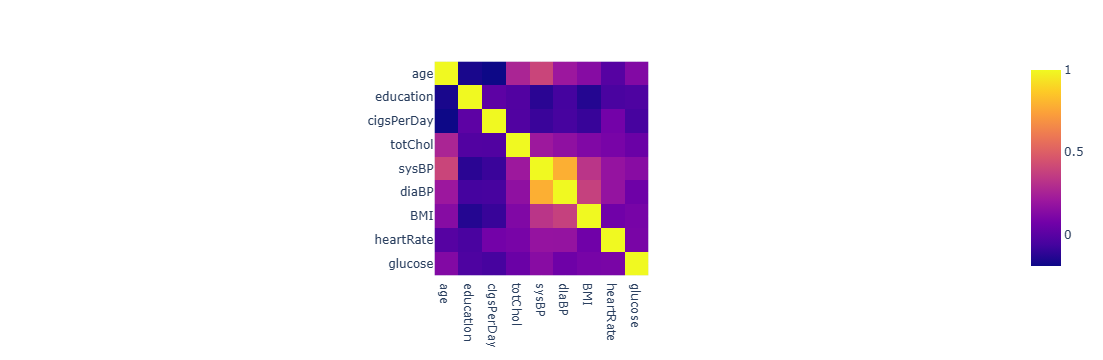

In [448]:
px.imshow(df.select_dtypes("number").corr())

In [449]:
df.isna().sum()

age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
gender               0
dtype: int64

In [450]:
df[df["cigsPerDay"].isna()][["currentSmoker","cigsPerDay"]]["currentSmoker"].unique()#only yes

array(['yes'], dtype=object)

In [451]:
df["cigsPerDay"].mean()

9.005936832106388

In [452]:
df["cigsPerDay"]=df["cigsPerDay"].fillna(9)

In [453]:
df["BPMeds"].unique()

array(['no', 'yes', nan], dtype=object)

In [454]:
df[df["BPMeds"].isna()]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
49,36,3.0,yes,20.0,NaN,no,yes,no,194.0,139.0,93.0,24.33,80.0,62.0,no,male
77,44,3.0,yes,20.0,NaN,no,no,no,213.0,115.0,72.5,21.16,80.0,89.0,no,female
193,45,3.0,yes,40.0,NaN,no,no,no,278.0,135.0,84.0,23.79,75.0,79.0,yes,male
245,46,1.0,yes,30.0,NaN,no,yes,no,253.0,147.0,85.0,30.62,100.0,75.0,no,male
314,39,2.0,no,0.0,NaN,no,no,no,242.0,113.0,85.0,25.54,85.0,104.0,no,female
395,65,2.0,no,0.0,NaN,no,yes,no,270.0,165.0,98.0,21.66,62.0,92.0,yes,female
421,44,1.0,no,0.0,NaN,no,no,yes,190.0,122.0,81.0,36.12,70.0,143.0,no,male
765,50,4.0,yes,9.0,NaN,no,no,no,296.0,119.0,90.0,23.55,75.0,69.0,yes,male
769,37,3.0,no,0.0,NaN,no,no,no,145.0,105.0,73.0,23.44,58.0,80.0,no,female
797,59,4.0,no,0.0,NaN,no,yes,no,240.0,195.0,118.0,23.82,80.0,73.0,no,female


In [455]:
df[df["prevalentHyp"]=="yes"]["BPMeds"].value_counts()

BPMeds
no     1171
yes     124
Name: count, dtype: int64

In [456]:
df[df["prevalentHyp"]=="no"]["BPMeds"].value_counts()

BPMeds
no    2892
Name: count, dtype: int64

In [457]:
df[(df["BPMeds"].isna())&(df["prevalentHyp"]=="no")]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
77,44,3.0,yes,20.0,NaN,no,no,no,213.0,115.0,72.5,21.16,80.0,89.0,no,female
193,45,3.0,yes,40.0,NaN,no,no,no,278.0,135.0,84.0,23.79,75.0,79.0,yes,male
314,39,2.0,no,0.0,NaN,no,no,no,242.0,113.0,85.0,25.54,85.0,104.0,no,female
421,44,1.0,no,0.0,NaN,no,no,yes,190.0,122.0,81.0,36.12,70.0,143.0,no,male
765,50,4.0,yes,9.0,NaN,no,no,no,296.0,119.0,90.0,23.55,75.0,69.0,yes,male
769,37,3.0,no,0.0,NaN,no,no,no,145.0,105.0,73.0,23.44,58.0,80.0,no,female
998,57,1.0,no,0.0,NaN,no,no,no,372.0,122.0,80.0,21.02,65.0,81.0,no,female
1122,67,1.0,yes,6.0,NaN,no,no,no,NaN,120.0,67.0,32.77,86.0,NaN,no,female
1284,41,1.0,yes,15.0,NaN,no,no,no,198.0,114.5,80.0,22.53,72.0,75.0,no,male
1301,43,3.0,yes,10.0,NaN,no,no,no,186.0,111.0,82.0,23.22,75.0,82.0,no,female


In [458]:
df[(df["BPMeds"].isna())&(df["prevalentHyp"]=="no")].index

Index([  77,  193,  314,  421,  765,  769,  998, 1122, 1284, 1301, 1566, 1573,
       1616, 1721, 1857, 1913, 1986, 2002, 2120, 2835, 2943, 3226, 3313, 3373,
       3375, 3644, 3737, 4008, 4139, 4162, 4235],
      dtype='int64')

In [459]:
indices_to_fill = [77, 193, 314, 421, 765, 769, 998, 1122, 1284, 1301, 1566, 1573,
                   1616, 1721, 1857, 1913, 1986, 2002, 2120, 2835, 2943, 3226, 
                   3313, 3373, 3375, 3644, 3737, 4008, 4139, 4162, 4235]

df.loc[indices_to_fill, "BPMeds"] = df.loc[indices_to_fill, "BPMeds"].fillna("no")

In [460]:
df[df["prevalentHyp"]=="yes"]["BPMeds"].value_counts()

BPMeds
no     1171
yes     124
Name: count, dtype: int64

In [461]:
df[(df["BPMeds"].isna())&(df["prevalentHyp"]=="yes")].index

Index([  49,  245,  395,  797, 1002, 1044, 1104, 1177, 1206, 1861, 1983, 1985,
       2074, 2173, 2181, 2367, 2608, 2645, 2738, 3526, 3791, 3816],
      dtype='int64')

In [462]:
indices_to_fills = [49, 245, 395, 797, 1002, 1044, 1104, 1177, 1206, 1861, 1983, 1985,
                   2074, 2173, 2181, 2367, 2608, 2645, 2738, 3526, 3791, 3816]
random_choices = np.random.choice(["yes", "no"], size=len(indices_to_fills))
for idx, value in zip(indices_to_fills, random_choices):
    if pd.isna(df.loc[idx, "BPMeds"]):
        df.loc[idx, "BPMeds"] = value

In [463]:
df.isna().sum()

age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
gender               0
dtype: int64

In [464]:
df["heartRate"].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

In [465]:
df[df["heartRate"].isna()]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
689,64,1.0,yes,18.0,no,no,yes,no,219.0,172.5,75.0,29.29,NaN,91.0,yes,male


In [466]:
df[df["age"]==64]["heartRate"].unique

<bound method Series.unique of 113      75.0
148      60.0
150      70.0
206     100.0
263      77.0
        ...  
4009     75.0
4089     68.0
4094     77.0
4113     76.0
4125     68.0
Name: heartRate, Length: 93, dtype: float64>

In [467]:
imputer=KNNImputer(n_neighbors=3)
imputed_data=imputer.fit_transform(df.select_dtypes("number"))
df_imputed=pd.DataFrame(imputed_data,columns=df.select_dtypes("number").columns)
df[df_imputed.columns]=df_imputed

In [468]:
df.isna().sum()

age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
gender             0
dtype: int64

# overview After Fill

In [470]:
df.describe()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,1.955189,9.005896,236.690252,132.354599,82.897759,25.797686,75.879167,81.836792
std,8.572942,1.018522,11.881610,44.380172,22.033300,11.910394,4.073995,12.023936,23.062014
min,32.000000,1.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000
50%,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,86.000000
max,70.000000,4.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4240 non-null   float64
 1   education        4240 non-null   float64
 2   currentSmoker    4240 non-null   object 
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   object 
 5   prevalentStroke  4240 non-null   object 
 6   prevalentHyp     4240 non-null   object 
 7   diabetes         4240 non-null   object 
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   object 
 15  gender           4240 non-null   object 
dtypes: float64(9), object(7)
memory usage: 530.1+ KB


In [472]:
df.describe(include="O")

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,gender
count,4240,4240,4240,4240,4240,4240,4240
unique,2,2,2,2,2,2,2
top,no,no,no,no,no,no,female
freq,2145,4105,4215,2923,4131,3596,2420


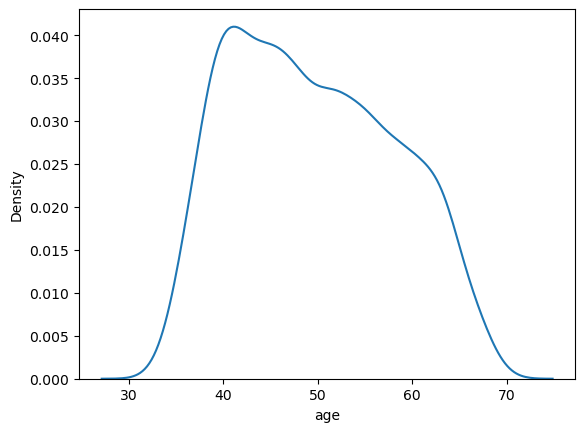

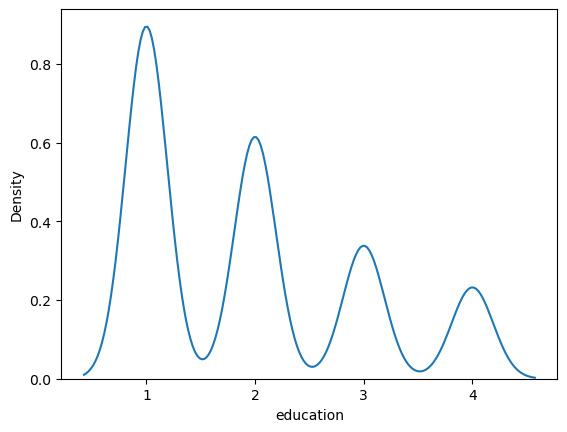

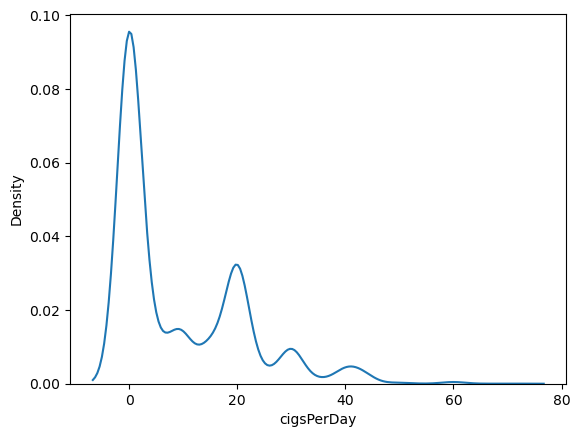

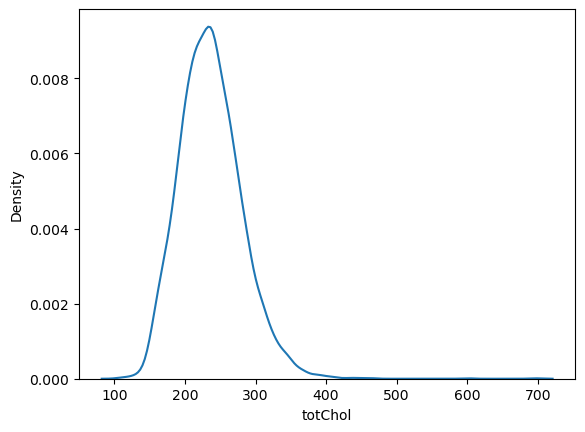

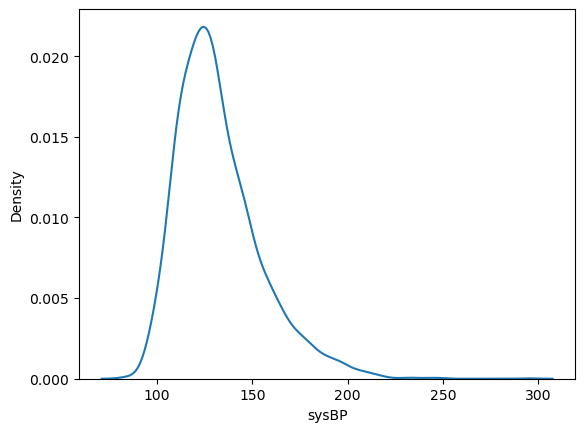

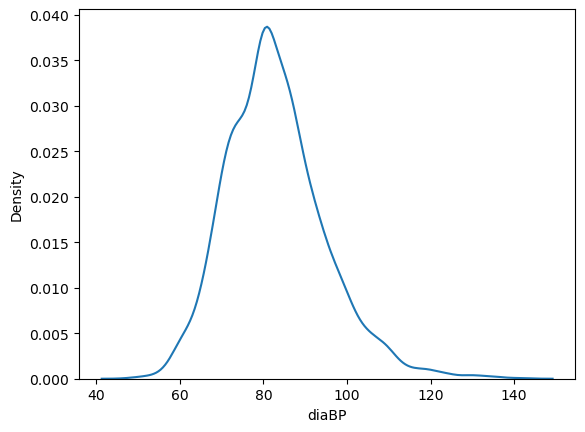

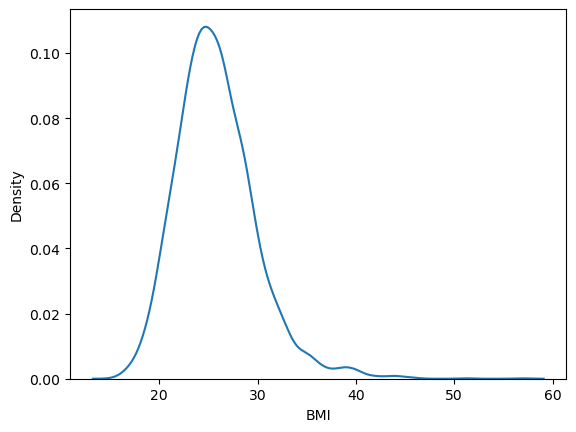

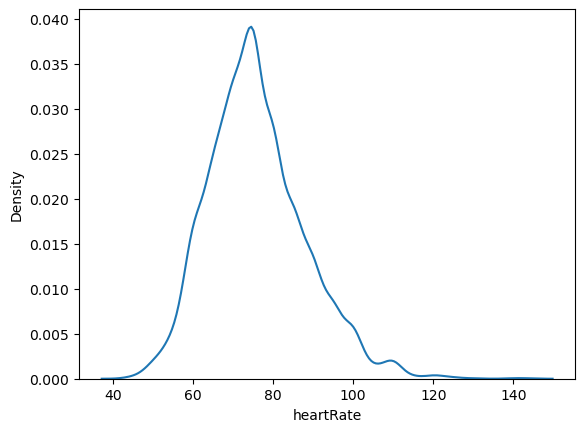

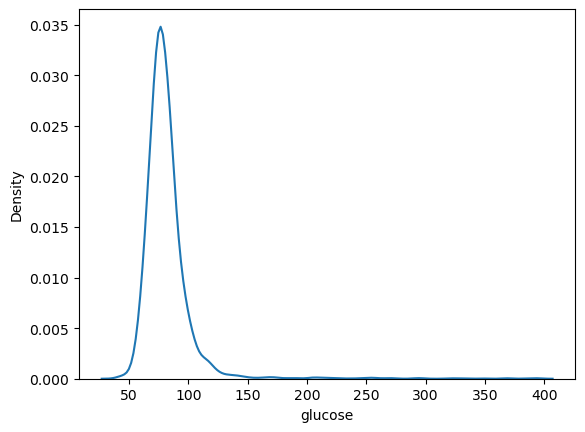

In [473]:
for col in df.select_dtypes("number").columns:
    plt.figure()
    sns.kdeplot(df[col])

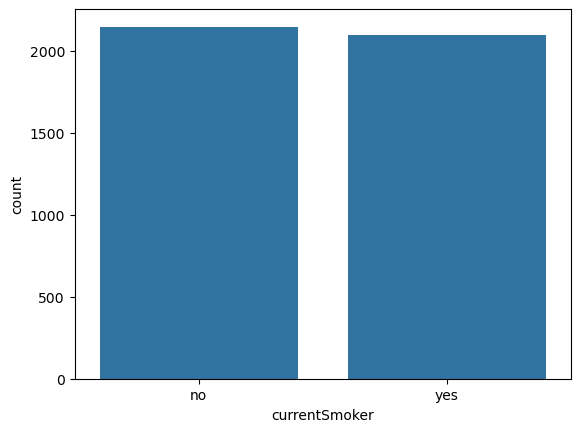

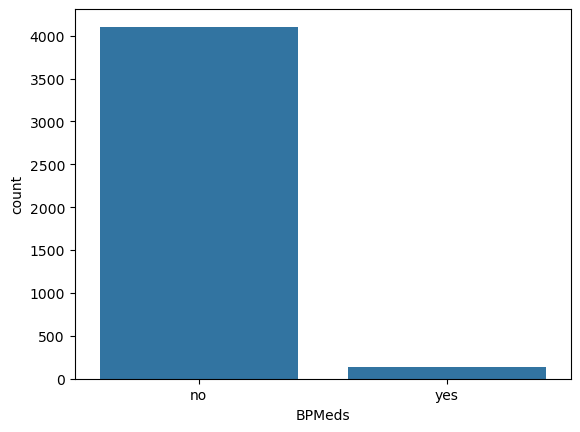

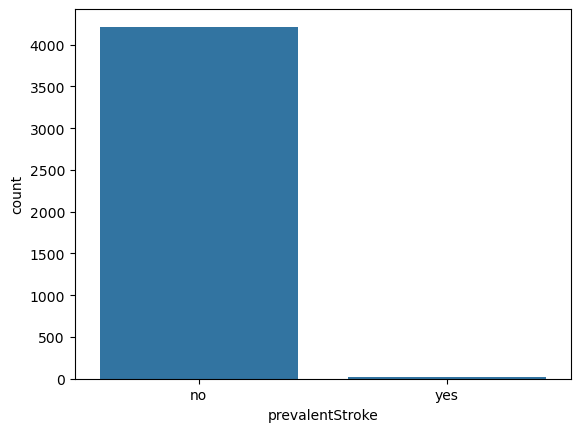

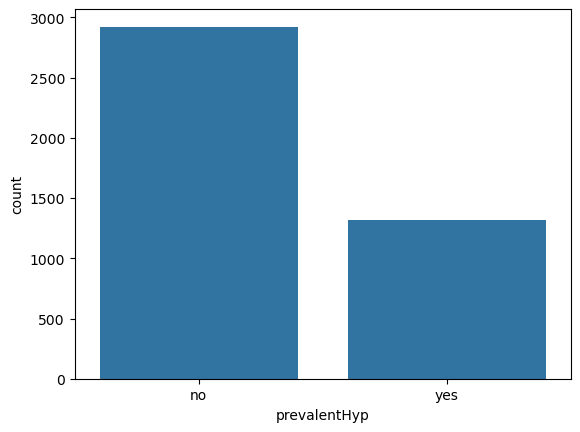

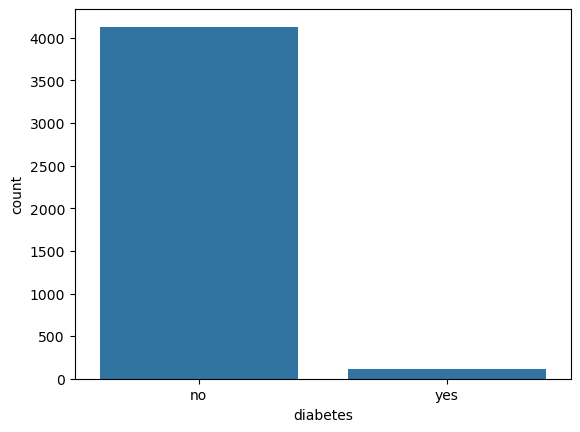

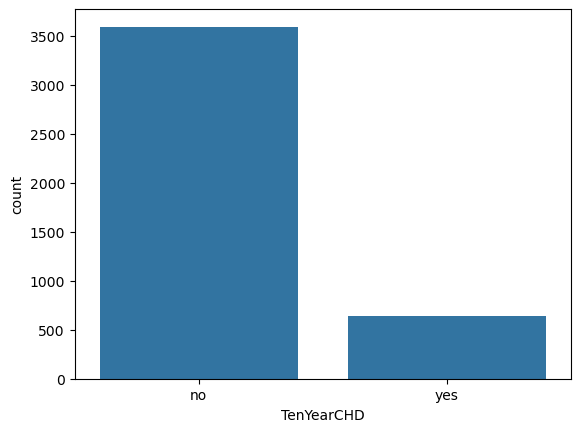

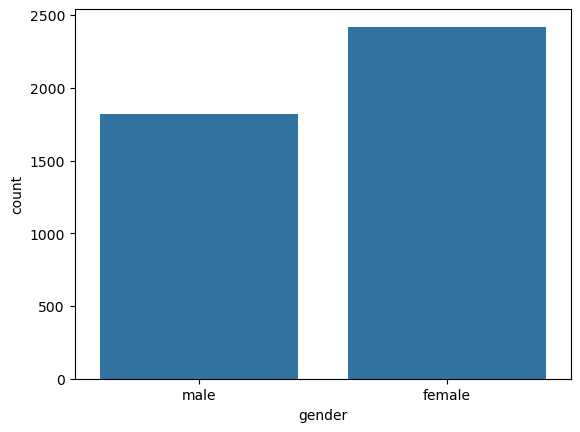

In [474]:
for col in df.select_dtypes(include="O").columns:
    plt.figure()
    sns.countplot(x=df[col])

In [475]:
df[df["cigsPerDay"]>50]#There is a problem with the heart rate being normal, although someone who smokes a lot of cigarettes is supposed to have an irregular heart rate.

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
327,56.0,1.0,yes,60.0,no,no,no,no,246.0,125.0,79.0,29.64,70.0,85.000000,no,male
721,59.0,1.0,yes,60.0,no,no,yes,no,298.0,153.5,105.0,25.05,70.0,84.000000,no,male
1054,58.0,2.0,yes,60.0,no,no,yes,no,250.0,150.0,97.0,32.00,75.0,65.000000,no,male
1452,39.0,1.0,yes,60.0,no,no,no,no,215.0,112.0,65.0,23.60,59.0,78.000000,no,male
1468,50.0,1.0,yes,60.0,no,no,yes,no,340.0,134.0,95.0,30.46,85.0,86.000000,no,male
1488,37.0,4.0,yes,60.0,no,no,no,no,254.0,122.5,82.5,23.87,88.0,83.000000,no,male
1849,48.0,1.0,yes,60.0,no,no,no,no,252.0,104.0,73.5,23.03,70.0,77.000000,no,male
2709,46.0,1.0,yes,60.0,no,no,no,no,285.0,121.0,82.0,27.62,70.0,79.000000,no,male
2710,49.0,2.0,yes,60.0,no,no,no,no,213.0,123.0,75.0,24.84,70.0,73.333333,yes,male
3008,40.0,3.0,yes,70.0,no,no,yes,no,210.0,132.0,86.0,31.57,98.0,80.000000,no,male


In [476]:
df["cigsPerDay"].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,  7.,
        6., 38., 29., 17., 16., 19., 70.])

In [477]:
df["cigsPerDay"] = df["cigsPerDay"].round().astype(int)

# Cleaning

<Axes: xlabel='currentSmoker', ylabel='heartRate'>

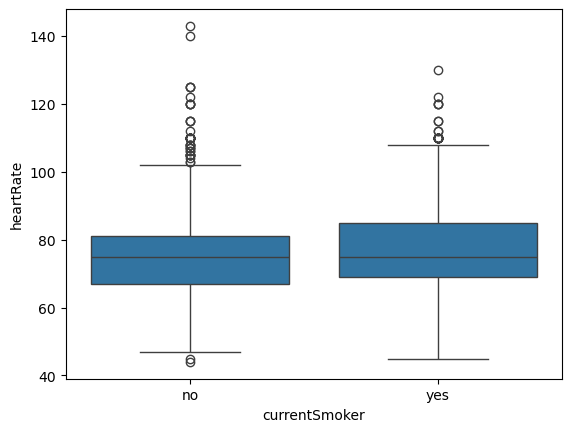

In [479]:
sns.boxplot(x='currentSmoker', y='heartRate', data=df)

In [480]:
df[df["currentSmoker"]=="yes"]["heartRate"].mean()

76.64184566428003

In [481]:
df[df["currentSmoker"]=="yes"]["glucose"].min()

40.0

In [482]:
df[df["currentSmoker"]=="no"]["heartRate"].mean()

75.13426573426574

In [483]:
df[df["currentSmoker"]=="no"]["glucose"].min()

40.0

In [484]:
df[(df["currentSmoker"]=="yes")&(df["cigsPerDay"]==0)]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender


In [485]:
df[(df["currentSmoker"]=="yes")&(df["cigsPerDay"]==0)].index

Index([], dtype='int64')

In [486]:
df.loc[[1497, 1625, 3021, 3106, 3177],"cigsPerDay"]=9


In [487]:
df[df["heartRate"]==df["heartRate"].min()]#normal

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
1233,59.0,1.0,no,0,no,no,no,no,229.0,100.5,66.0,25.18,44.0,81.0,no,male


In [488]:
df[df["heartRate"]==df["heartRate"].max()]#normal

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
3142,57.0,1.0,no,0,no,no,no,no,257.0,133.0,94.0,17.71,143.0,75.0,no,female


In [489]:
df[df["BMI"]==df["BMI"].max()]#normal

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
2657,55.0,1.0,no,0,no,no,yes,no,208.0,190.0,130.0,56.8,90.0,86.0,yes,female


In [490]:
df[df["BMI"]==df["BMI"].min()]#normal

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
377,67.0,1.0,no,0,no,no,no,no,203.0,122.0,74.0,15.54,96.0,79.0,no,male


In [491]:
df[df["sysBP"]==df["sysBP"].min()]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
2665,58.0,1.0,yes,15,no,no,no,no,175.0,83.5,58.0,29.66,95.0,115.0,no,male
3487,35.0,2.0,yes,20,no,no,no,no,168.0,83.5,55.0,16.71,79.0,63.0,yes,female


# outlier

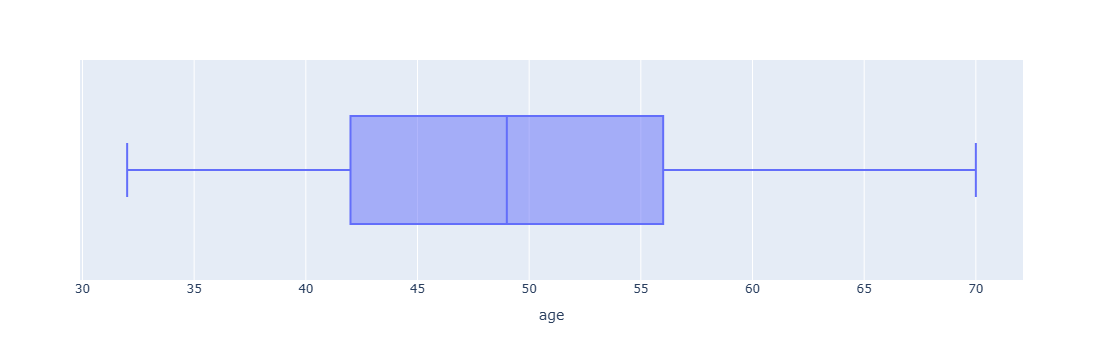

In [493]:
px.box(df,x=df["age"])

In [494]:
df.select_dtypes("number").columns

Index(['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

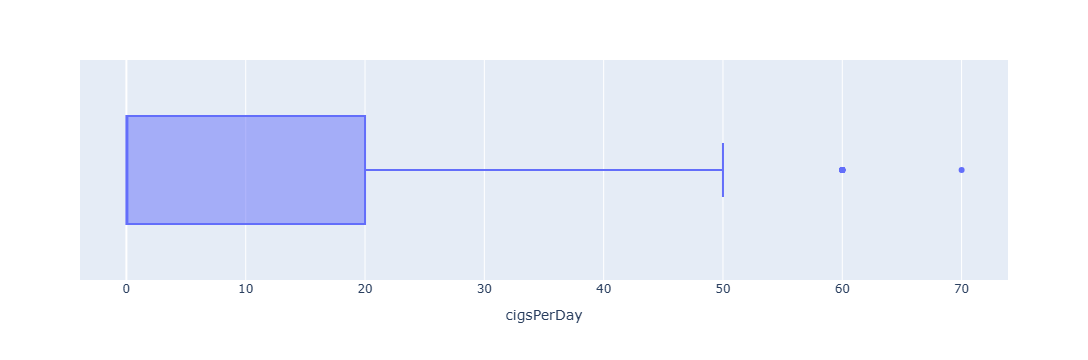

In [495]:
px.box(df,x=df['cigsPerDay'])

In [496]:
df[df['cigsPerDay']>50]#As you can see, there are two outlier values, 60 and 70, which may be correct or incorrect depending on the context.
#I have doubts about some rows where the number of cigarettes smoked per day is 60, yet the heart rate appears to be very normal, which seems quite unusual.

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
327,56.0,1.0,yes,60,no,no,no,no,246.0,125.0,79.0,29.64,70.0,85.000000,no,male
721,59.0,1.0,yes,60,no,no,yes,no,298.0,153.5,105.0,25.05,70.0,84.000000,no,male
1054,58.0,2.0,yes,60,no,no,yes,no,250.0,150.0,97.0,32.00,75.0,65.000000,no,male
1452,39.0,1.0,yes,60,no,no,no,no,215.0,112.0,65.0,23.60,59.0,78.000000,no,male
1468,50.0,1.0,yes,60,no,no,yes,no,340.0,134.0,95.0,30.46,85.0,86.000000,no,male
1488,37.0,4.0,yes,60,no,no,no,no,254.0,122.5,82.5,23.87,88.0,83.000000,no,male
1849,48.0,1.0,yes,60,no,no,no,no,252.0,104.0,73.5,23.03,70.0,77.000000,no,male
2709,46.0,1.0,yes,60,no,no,no,no,285.0,121.0,82.0,27.62,70.0,79.000000,no,male
2710,49.0,2.0,yes,60,no,no,no,no,213.0,123.0,75.0,24.84,70.0,73.333333,yes,male
3008,40.0,3.0,yes,70,no,no,yes,no,210.0,132.0,86.0,31.57,98.0,80.000000,no,male


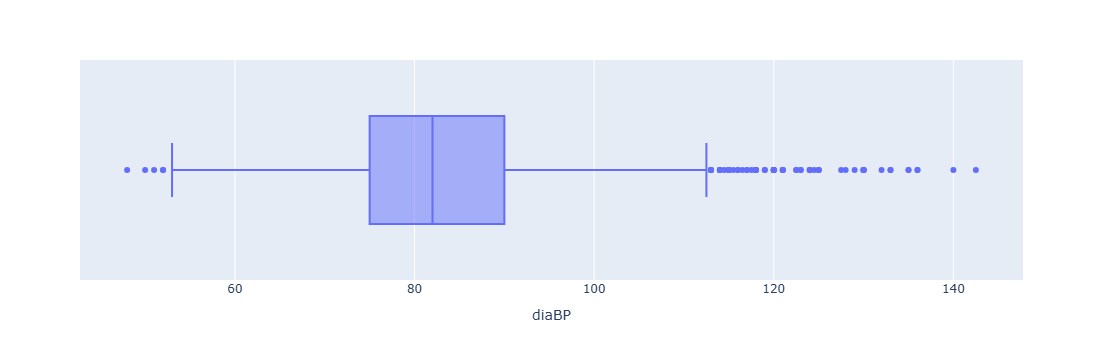

In [497]:
px.box(df,x=df["diaBP"])

In [498]:
df[(df["diaBP"]<52.5)|(df["diaBP"]>112.5)]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
28,61.0,3.0,no,0,no,no,yes,no,272.0,182.0,121.0,32.80,85.0,65.000000,yes,female
46,65.0,1.0,no,0,no,no,yes,no,252.0,179.5,114.0,30.47,90.0,87.000000,no,female
158,49.0,3.0,no,0,yes,no,yes,no,254.0,191.0,124.5,28.35,78.0,54.000000,no,female
249,60.0,1.0,yes,20,no,no,no,yes,180.0,200.0,122.5,44.27,88.0,150.000000,no,female
407,46.0,2.0,no,0,no,no,yes,no,184.0,188.0,123.0,34.36,90.0,76.333333,no,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,63.0,4.0,yes,25,no,no,yes,no,203.0,192.5,125.0,26.18,80.0,83.000000,yes,male
4076,61.0,1.0,no,0,yes,no,yes,yes,265.0,200.0,125.0,29.50,68.0,256.000000,yes,female
4123,51.0,3.0,no,0,no,no,yes,no,268.0,206.0,116.0,26.35,98.0,70.000000,yes,male
4173,54.0,2.0,no,0,no,no,yes,no,302.0,210.0,127.5,31.98,68.0,79.000000,no,female


In [499]:
df[(df["diaBP"]>113)]["prevalentHyp"].value_counts()

prevalentHyp
yes    66
no      1
Name: count, dtype: int64

In [500]:
df[(df["diaBP"]>113)]["prevalentHyp"].value_counts()

prevalentHyp
yes    66
no      1
Name: count, dtype: int64

In [501]:
df[(df["diaBP"]>113)&(df["prevalentHyp"]=="no")].index#unormal

Index([249], dtype='int64')

In [502]:
df.loc[[249],"prevalentHyp"]="yes"

In [503]:
df[(df["diaBP"]<53)]["prevalentHyp"].value_counts()#normal 

prevalentHyp
no    5
Name: count, dtype: int64

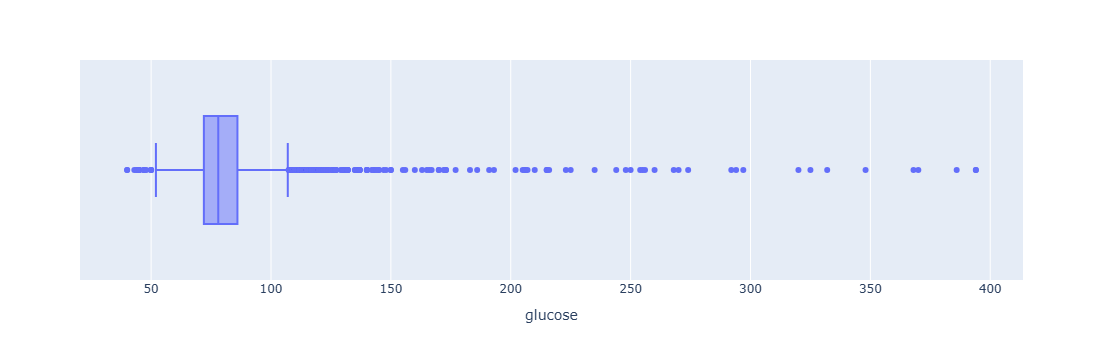

In [504]:
px.box(df,x=df["glucose"])

In [505]:
df[df["glucose"]>200]["diabetes"].value_counts()#normal

diabetes
yes    34
Name: count, dtype: int64

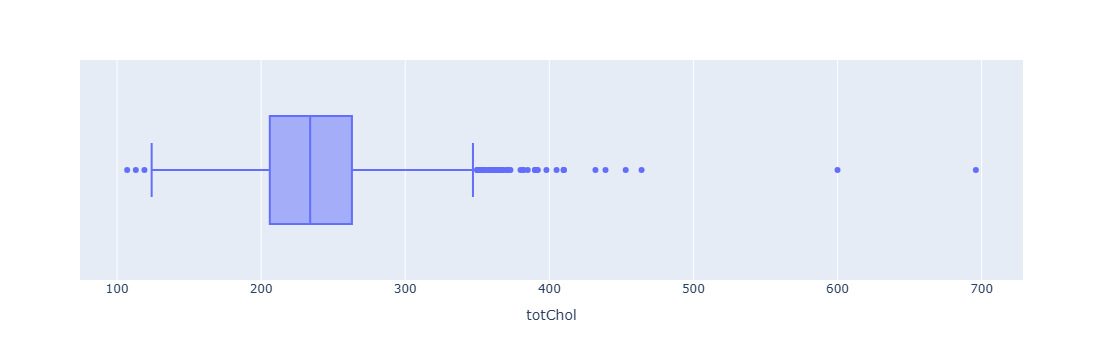

In [506]:
px.box(df,x=df["totChol"])

In [507]:
df[df["totChol"]>350]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
194,42.0,3.0,no,0,no,no,no,no,464.0,128.0,87.0,22.90,72.0,72.000000,yes,female
259,60.0,1.0,no,0,no,no,yes,no,352.0,197.5,105.0,36.29,75.0,95.000000,yes,female
333,55.0,2.0,no,0,yes,no,yes,no,368.0,204.0,94.0,25.20,100.0,81.000000,no,female
533,53.0,2.0,no,0,no,no,no,no,370.0,123.0,83.0,24.64,63.0,74.000000,yes,female
543,47.0,2.0,yes,18,no,no,yes,no,439.0,145.0,74.0,22.42,100.0,90.000000,yes,male
617,51.0,3.0,yes,3,no,no,yes,no,398.0,161.0,96.0,23.63,77.0,83.000000,no,female
670,65.0,2.0,no,0,no,no,no,no,355.0,138.0,79.0,28.38,75.0,108.000000,no,female
920,60.0,1.0,yes,15,no,no,no,no,353.0,116.0,82.0,22.66,85.0,71.000000,no,female
926,61.0,1.0,yes,20,no,no,yes,no,360.0,157.0,99.0,28.74,95.0,73.000000,no,male
998,57.0,1.0,no,0,no,no,no,no,372.0,122.0,80.0,21.02,65.0,81.000000,no,female


In [508]:
df[df["totChol"]>500]#first normal but secound no 

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
1111,52.0,2.0,no,0,no,no,yes,yes,600.0,159.5,94.0,28.27,78.0,140.0,yes,female
3160,51.0,1.0,yes,9,no,no,yes,no,696.0,157.0,87.0,24.44,95.0,84.0,no,male


In [509]:
df.loc[3160,'totChol'] = 350

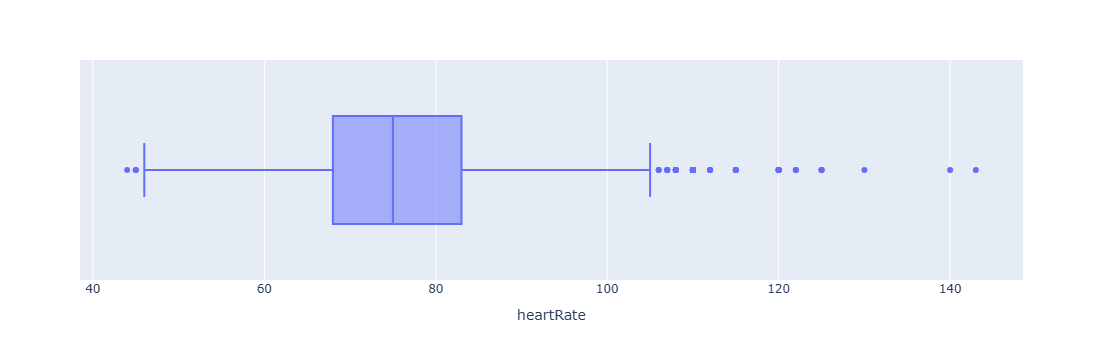

In [510]:
px.box(df,x=df["heartRate"])


In [511]:
df[df["heartRate"]>105]["currentSmoker"].value_counts()

currentSmoker
no     38
yes    35
Name: count, dtype: int64

In [512]:
df[df["heartRate"]>105]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender
162,47.0,2.0,no,0,no,no,no,no,174.0,118.0,86.5,26.15,110.0,86.000000,no,female
270,54.0,1.0,no,0,no,no,yes,no,273.0,139.0,98.0,29.06,110.0,73.000000,yes,female
339,64.0,1.0,no,0,no,no,yes,no,312.0,160.0,82.0,27.59,140.0,94.000000,no,female
358,40.0,3.0,yes,20,no,no,no,no,210.0,118.0,79.0,21.21,130.0,84.000000,no,female
382,53.0,1.0,no,0,no,no,yes,no,174.0,165.0,93.0,27.45,108.0,100.000000,no,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,41.0,4.0,yes,40,no,no,no,no,254.0,141.0,100.0,27.68,110.0,65.666667,yes,male
3964,39.0,3.0,no,0,no,no,no,no,213.0,125.0,87.0,16.73,110.0,75.000000,no,female
4053,44.0,1.0,no,0,no,no,no,no,160.0,107.0,69.0,18.63,125.0,78.000000,no,female
4070,40.0,3.0,no,0,no,no,yes,no,202.0,158.0,103.0,28.35,125.0,80.000000,no,female


# feather engineering

### Pulse pressure, an important indicator of heart health.

In [515]:
def classify_blood_pressure(data):

    systolic,diastolic=data["sysBP"],data["diaBP"]
    
    if systolic < 90 or diastolic < 60:
        return "Low (Hypotension)"
    elif 90 <= systolic < 120 and 60 <= diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return "High (Hypertension Stage 1)"
    elif 140 <= systolic < 180 or 90 <= diastolic < 120:
        return "High (Hypertension Stage 2)"
    else:
        return "Hypertensive Crisis (Seek Medical Attention)"


df["BP_Cat"] = df.apply(classify_blood_pressure, axis=1)

In [516]:
def classifyBMI(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese (Class 1)'
    elif 35 <= bmi < 40:
        return 'Obese (Class 2)'
    else:
        return 'Obese (Class 3)'

df["BMI_category"]=df["BMI"].apply(classifyBMI)

In [517]:
df["BMI_category"].unique()

array(['Overweight', 'Normal Weight', 'Obese (Class 1)',
       'Obese (Class 2)', 'Obese (Class 3)', 'Underweight'], dtype=object)

In [518]:
def classifyHeartRate(hr):
    if hr < 60:
        return 'Bradycardia (Low)'
    elif 60 <= hr <= 100:
        return 'Normal'
    else:
        return 'Tachycardia (High)'

df["heartRate_cat"]=df["heartRate"].apply(classifyHeartRate)

In [519]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'gender',
       'BP_Cat', 'BMI_category', 'heartRate_cat'],
      dtype='object')

In [521]:
df["age"].unique()

array([39., 46., 48., 61., 43., 63., 45., 52., 50., 41., 38., 42., 44.,
       47., 60., 35., 36., 59., 54., 37., 56., 53., 49., 65., 51., 62.,
       40., 67., 57., 66., 64., 55., 58., 34., 68., 33., 70., 32., 69.])

In [522]:
def classifyGlucose(glucose):
    if glucose < 100:
        return 'Normal'
    elif 100 <= glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'
df["glucose_cat"]=df["glucose"].apply(classifyGlucose)

In [523]:
def categorize_age_column(df, col_name='age'):

    bins = [30, 39, 49, 59, 69, float('inf')]
    labels = ['Young Adult', 'Middle-Aged Adult', 'Older Adult', 'Senior', 'Elderly']
    
    df['age_cat'] = pd.cut(df[col_name], bins=bins, labels=labels)
    return df
df = categorize_age_column(df)    

In [524]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'gender',
       'BP_Cat', 'BMI_category', 'heartRate_cat', 'age_group', 'glucose_cat',
       'age_cat'],
      dtype='object')

In [525]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'gender',
       'BP_Cat', 'BMI_category', 'heartRate_cat', 'age_group', 'glucose_cat',
       'age_cat'],
      dtype='object')

In [526]:
df["education"]=df["education"].astype("int")

In [527]:
df["education"].unique()

array([4, 2, 1, 3])

In [528]:
def makeEducationLevels(data):
    if data==1:
        return "low level"
    elif data==2:
        return "intermediate level"
    elif data==3:
        return "high level"
    else:
        return "advanced level"

df["education_cat"]=df["education"].apply(makeEducationLevels)

In [529]:
def classify_smoker(cigs):
    if cigs == 0:
        return 'Non-smoker'
    elif 1 <= cigs <= 10:
        return 'Light'
    elif 11 <= cigs <= 20:
        return 'Moderate'
    else:
        return 'Heavy'
df['cigsPerDay_category'] = df['cigsPerDay'].apply(classify_smoker)        

In [530]:
def makeCholestralCategories(data):
    if data<200:
        return "Desirable"
    elif 200<=data<=239:
        return "BorderLine"
    else:
        return "High"

df["totChol_cat"]=df["totChol"].apply(makeCholestralCategories)

In [531]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'gender',
       'BP_Cat', 'BMI_category', 'heartRate_cat', 'age_group', 'glucose_cat',
       'age_cat', 'education_cat', 'cigsPerDay_category', 'totChol_cat'],
      dtype='object')

In [532]:
df.to_csv(r"C:\Users\NOUR SOFT\Desktop\New folder\framingham_heart_study_after2.csv",index=False)

In [533]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'gender',
       'BP_Cat', 'BMI_category', 'heartRate_cat', 'age_group', 'glucose_cat',
       'age_cat', 'education_cat', 'cigsPerDay_category', 'totChol_cat'],
      dtype='object')

In [5]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64